## Lung Cancer Pre-Screening Risk Prediction 
This application classifies whether or not a patient is high risk for lung cancer based on their clinical parameters given in the following survey.
This survey is intended for adults aged 18 or older.

In [1]:
# Tools

# ipywidgets for user interaction
import ipywidgets as widgets

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow plots to appear inside the notebook
%matplotlib inline

# Scikit-Learn Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# To save model using pickle
import pickle

# Load data into dataframe
df = pd.read_csv("survey_lung_cancer.csv")

# Load logistic regression model
loaded_model = pickle.load(open("logistic_regression_model.pkl", "rb"))

In [2]:
# Load data into dataframe
df = pd.read_csv("survey_lung_cancer.csv")


In [3]:
# GUI elements.

# Gender dropdown
gender = widgets.Dropdown(
    options=[('Male', 2), ('Female', 1)],
    value=2,
    description='Gender:',
)

# Age input
age = widgets.BoundedIntText(
    min=18,
    max=110,
    step=1,
    description='Age:',
    disabled=False
)

# Smoking history checkbox
smoking_hx = widgets.Checkbox(
    value=False,
    description='Smoking',
    disabled=False,
    indent=False
)
def sh(smoking_hx):
    if smoking_hx.value:
        smoking = 2
    else:
        smoking = 1
    return smoking

# Peer pressure checkbox
peer_pressure = widgets.Checkbox(
    value=False,
    description='Peer-pressure to continue smoking',
    disabled=False,
    indent=False
)
def pp(peer_pressure):
    if peer_pressure.value:
        peer_press = 2
    else:
        peer_press = 1
    return peer_press

# Yellow finger checkbox
yf = widgets.Checkbox(
    value=False,
    description='Yellowing of the fingers',
    disabled=False,
    indent=False
)
def yell_fin(yf):
    if yf.value:
        yellow_fingers = 2
    else:
        yellow_fingers = 1
    return yellow_fingers

# Anxiety checkbox
anxiety_checkbox = widgets.Checkbox(
    value=False,
    description='Anxiety',
    disabled=False,
    indent=False
)
def anxiety_dx(anxiety_checkbox):
    if anxiety_checkbox.value:
        anxiety = 2
    else:
        anxiety = 1
    return anxiety

# Chronic disease checkbox
chronic_disease = widgets.Checkbox(
    value=False,
    description='Chronic disease',
    disabled=False,
    indent=False
)
def chronic_dx(chronic_disease):
    if chronic_disease.value:
        cd = 2
    else:
        cd = 1
    return cd

# Fatigue checkbox
fatigue = widgets.Checkbox(
    value=False,
    description='Fatigue',
    disabled=False,
    indent=False
)
def noticeable_fatigue(fatigue):
    if fatigue.value:
        f = 2
    else:
        f = 1
    return f

# Allergy checkbox
allergy = widgets.Checkbox(
    value=False,
    description='Allergies',
    disabled=False,
    indent=False
)
def allergy_dx(allergy):
    if allergy.value:
        allergies = 2
    else:
        allergies = 1
    return allergies

# Wheezing checkbox
wheezing = widgets.Checkbox(
    value=False,
    description='Wheezing',
    disabled=False,
    indent=False
)
def wheezing_present(wheezing):
    if wheezing.value:
        w =2
    else:
        w = 1
    return w

# Alcohol consumption checkbox
alcohol_consumption = widgets.Checkbox(
    value=False,
    description='Alcohol Consumption',
    disabled=False,
    indent=False
)
def alcohol_use(alcohol_consumption):
    if alcohol_consumption.value:
        ac = 2
    else:
        ac = 1
    return ac

# Chronic cough checkbox
coughing = widgets.Checkbox(
    value=False,
    description='Chronic cough',
    disabled=False,
    indent=False
)
def chronic_cough(coughing):
    if coughing.value:
        cough = 2
    else:
        cough = 1
    return cough

# Shortness of breath checkbox
shortness_of_breath = widgets.Checkbox(
    value=False,
    description='Shortness of breath',
    disabled=False,
    indent=False
)
def sob_present(shortness_of_breath):
    if shortness_of_breath.value:
        sob = 2
    else:
        sob = 1
    return sob

# Swallowing difficulty checkbox
swallowing_difficulty = widgets.Checkbox(
    value=False,
    description='Swallowing difficulty',
    disabled=False,
    indent=False
)
def swall_diff(swallowing_difficulty):
    if swallowing_difficulty.value:
        sd = 2
    else:
        sd = 1
    return sd
    
# Chest pain checkbox
chest_pain = widgets.Checkbox(
    value=False,
    description='Chest pain',
    disabled=False,
    indent=False
)
def c_pain(chest_pain):
    if chest_pain.value:
        cp = 2
    else:
        cp = 1
    return cp

out = widgets.Output(layout={'border': '1px solid black'})

# Gender/Age Hbox
ga = [gender, age]
ga_box = widgets.HBox(ga)

# Checkbox Gridbox
cb = [smoking_hx, peer_pressure, yf, anxiety_checkbox, chronic_disease, fatigue, allergy, wheezing, alcohol_consumption, coughing, shortness_of_breath, swallowing_difficulty, chest_pain]
cb_box = widgets.GridBox(cb, layout=widgets.Layout(grid_template_columns="repeat(2, 300px)"))




# Predict button
predict_button = widgets.Button(
    description='Predict',
    disabled=False,
    button_style='info',
    )
def predict_click(b):
    out.clear_output()
    # Load logistic regression model
    loaded_model = pickle.load(open("logistic_regression_model.pkl", "rb"))
    
    smoking = sh(smoking_hx)
    yellow_fingers = yell_fin(yf)
    anxiety = anxiety_dx(anxiety_checkbox)
    peer_press =pp(peer_pressure)
    cd = chronic_dx(chronic_disease)
    f = noticeable_fatigue(fatigue)
    allergies = allergy_dx(allergy)
    w = wheezing_present(wheezing)
    ac = alcohol_use(alcohol_consumption)
    cough = chronic_cough(coughing)
    sob = sob_present(shortness_of_breath)
    sd = swall_diff(swallowing_difficulty)
    cp = c_pain(chest_pain)
    
    # Create dataframe from user's selections 
    df3 = pd.DataFrame({'GENDER': [gender.value],'AGE': [age.value], 'SMOKING': [smoking], 'YELLOW_FINGERS': [yellow_fingers], 'ANXIETY': [anxiety], 
                        'PEER_PRESSURE': [peer_press], 'CHRONIC_DISEASE': [cd], 'FATIGUE ': [f], 'ALLERGY ': [allergies], 'WHEEZING': [w], 
                        'ALCOHOL_CONSUMING': [ac], 'COUGHING': [cough], 'SHORTNESS_OF_BREATH': [sob], 'SWALLOWING_DIFFICULTY': [sd], 
                        'CHEST_PAIN': [cp] })
    loaded_model_prediction = loaded_model.predict(df3)
    with out:
        # Output risk prediction
        if loaded_model_prediction == 1:
            print("High Risk")
        if loaded_model_prediction == 0:
            print("Low Risk")

predict_button.on_click(predict_click)


# Buttons
# buttons = [predict_button, other_button]
# HBox containing buttons
# button_box = widgets.HBox(buttons)


In [4]:
ui_parts = [ga_box, cb_box, predict_button, out]
interface = widgets.VBox(ui_parts)
interface

## Data
The data used for this project is licensed for public domain use and is available on Kaggle. 
The html link provided will take you to the dataset listing on Kaggle.
https://www.kaggle.com/mysarahmadbhat/lung-cancer
    

## Evaluation

Prediction accuracy of 90% or greater at predicting whether or not a patient is high risk for lung cancer constitutes this project's success.
Please see below for model decision information, evaluation, and cross-validation information.


In [5]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [6]:
# Split data into train and test sets
# NumPy random seed used so that results can be reproduced
np.random.seed(42)

#Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Build a machine learning model to find the patterns on a training set
# Model will be tested on the test set

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed to make sure results are reproducible
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [8]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Comparison
The bar graph below illustrates the accuracy of three classification algorithms on the data provided in the information above.
Logistic regression was chosen due to receiving the highest accuracy score.

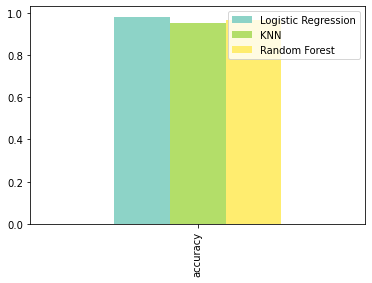

In [9]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
plot =model_compare.plot.bar(colormap="Set3");

In [10]:
### Hyperparameter tuning with RandomizedSearchCV()

# The logistic regression model was tuned using RandomizedSearchCV().



In [11]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [12]:


# Tune each of our models with RandomizedSearchCV using the above hyperparameter grids
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                )
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
{
    "tags": [
        "hide-output"
    ]
};


In [13]:
# rs_log_reg.best_params_

In [14]:
# rs_log_reg.score(X_test, y_test)

In [15]:
# Tune RandomForestClassifier

# Tune each of our models with RandomizedSearchCV using the above hyperparameter grids
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5, 
                                n_iter=20,
                                )
# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)
{
    "tags": [
        "hide-output"
    ]
};


In [16]:
# Evaluate the randomized search RandomForestClassifier model
# rs_rf.score(X_test, y_test)

In [17]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          )

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);


In [18]:
# Check the best hyperparameters
# gs_log_reg.best_params_

In [19]:
# gs_log_reg.score(X_test, y_test)

## Evaluating Tuned Machine Learning Classifier, Beyond Accuracy
* ROC Curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [20]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

## ROC Curve

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


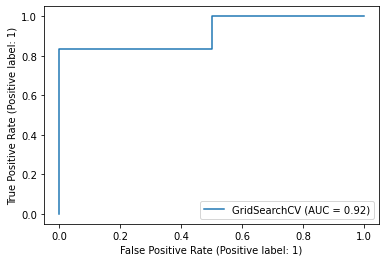

In [21]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

## Confusion Matrix
The below confusion matrix uses a heatmap to illustrate the algorithm's accuracy.
One can see there was only one false positive and one false negative predicted when the algorithm was deployed on the test data provided.


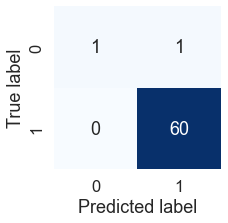

In [22]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                     cmap="Blues",
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

## Classification Report, Cross-validated Precision, Recall, and Fl-score

### Cross-validation

Precision, recall and f1-scores of the model using cross-validation.

In [23]:
# Check best hyperparameters
# gs_log_reg.best_params_

In [24]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=417.53189365604004,
                        solver="liblinear")

In [25]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
# Save mean cross-validated accuracy
cv_acc = np.mean(cv_acc) 
# cv_acc

In [26]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
# Save mean cross-validated precision
cv_precision = np.mean(cv_precision)
# cv_precision

In [27]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
# Save mean cross-validated recall
cv_recall = np.mean(cv_recall)
# cv_recall

In [28]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
# Save mean cross-validated f1 
cv_f1 = np.mean(cv_f1)
# cv_f1

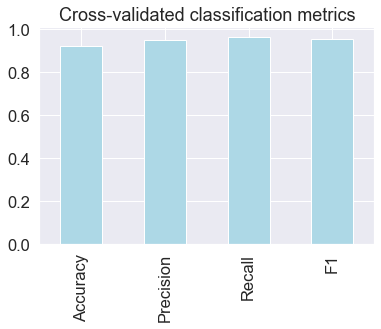

In [29]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      color="lightblue",
                     legend=False);


## Feature Importance

Below is a glance at which features most contributed to the outcomes of the model.


In [30]:
# gs_log_reg.best_params_

In [31]:
clf = LogisticRegression(C=417.53189365604004,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [32]:
# Check coef
# clf.coef_

In [33]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

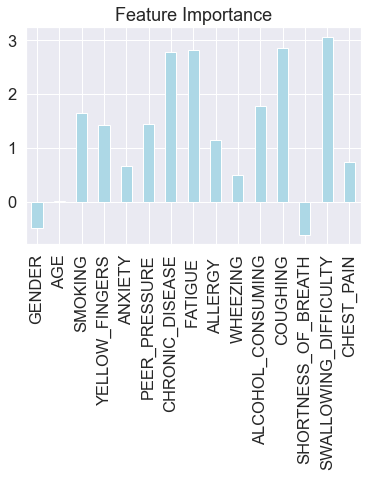

In [34]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", color="lightblue", legend=False);

## Feature Contribution
Below is a closer look at the correlation of lung cancer risk associated with a documented persistent cough.

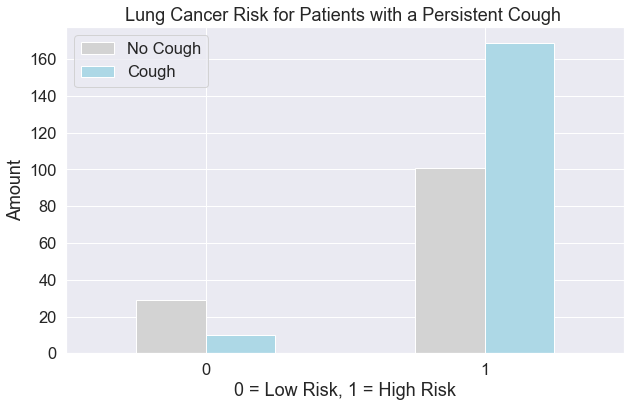

In [35]:
# Create a plot of crosstab 
pd.crosstab(df.target, df.COUGHING).plot(kind="bar",
                                       figsize=(10, 6),
                                       color=["lightgrey", "lightblue"])
plt.title("Lung Cancer Risk for Patients with a Persistent Cough ")
plt.xlabel("0 = Low Risk, 1 = High Risk")
plt.ylabel("Amount")
plt.legend(["No Cough", "Cough"]);
plt.xticks(rotation=0);

### Distribution of Participant Age

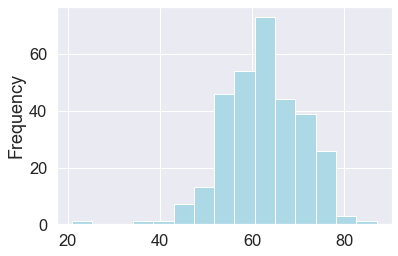

In [36]:
df.AGE.plot.hist(bins=15, color = "lightblue");

In [37]:
# Save cross-validated model to file
pickle.dump(clf, open("logistic_regression_model.pkl", "wb"))